In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import preprocessing 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dataset.csv


# Etude de l'impact des paramètres des algorithmes

In [44]:
df = pd.read_csv("/kaggle/input/dataset.csv", sep=",")
df.head(10)


,algo,taillePVC,nbIterationAlgo,param1,param2,param3,distanceOpt,tpsMs
0,ag,40,733,13.0,12.000000,0.034764,7930.967168,2795.022824
1,ag,40,204,3.0,6.000000,0.066821,12361.769112,75.617579
2,rs,60,641,417.0,0.980841,NaN,10696.753733,4130.931501
3,tabu,70,641,3.0,NaN,NaN,12882.784121,4693.440469
4,ag,40,641,12.0,11.000000,0.067640,8072.497384,1885.117133
5,rs,80,707,180.0,0.996480,NaN,19963.216868,3686.307071
6,tabu,80,707,4.0,NaN,NaN,19950.584269,3686.161065
7,ag,90,707,20.0,6.000000,0.048219,19910.644607,5028.933994
8,tabu,50,907,6.0,NaN,NaN,10584.147074,2748.123549
9,rs,90,907,431.0,0.996854,NaN,21744.758918,4972.796663


In [18]:
df.algo.value_counts()

ag      11075
rs      11073
tabu    11072
Name: algo, dtype: int64

On a un dataset équilibré en ce qui concerne le nombre de calculs effectués par chaque algorithme. On cherche à définir pour chaque algorithme un score que l'on utilisera comme référence pour le reste de l'étude. On choisi de prendre en compte à la fois le rapport entre la distance optimale obtenue et le nombre de villes dans la simulation mais également le temps de calcul : 

$score = \frac{distanceOpt}{nombreVille\times \log{(temps)}}$



In [69]:
df["rslt"] = df["nbIterationAlgo"]/(df["taillePVC"])
df["score"] = df["distanceOpt"]/(np.log(df["tpsMs"])*(df["taillePVC"]))
df.head()

,algo,taillePVC,nbIterationAlgo,param1,param2,param3,distanceOpt,tpsMs,rslt,score
0,ag,40,733,13.0,12.000000,0.034764,7930.967168,2795.022824,18.325000,24.985419
1,ag,40,204,3.0,6.000000,0.066821,12361.769112,75.617579,5.100000,71.443935
2,rs,60,641,417.0,0.980841,NaN,10696.753733,4130.931501,10.683333,21.411686
3,tabu,70,641,3.0,NaN,NaN,12882.784121,4693.440469,9.157143,21.769753
4,ag,40,641,12.0,11.000000,0.067640,8072.497384,1885.117133,16.025000,26.759381


On réalise un découpage du set en fonction de l'agorithme qui a été utilisé puis on supprime les colonnes paramètres inutiles pour chaque algorithme (en effet chaque algorithme ne prend pas en compte le même nombre de paramètres ce qui donne lieu à des valeurs NaN dans le dataset initial) : 

In [71]:
ag = df.algo == "ag"
rs = df.algo == "rs"
ta = df.algo == "tabu"

In [72]:
df_ag = df[ag]
df_rs = df[rs]
df_ta = df[ta]

In [73]:
df_ta.drop(["param2","param3"],axis = 1)
df_rs.drop(["param3"],axis = 1)

,algo,taillePVC,nbIterationAlgo,param1,param2,distanceOpt,tpsMs,rslt,score
2,rs,60,641,417.0,0.980841,10696.753733,4130.931501,10.683333,21.411686
5,rs,80,707,180.0,0.996480,19963.216868,3686.307071,8.837500,30.385856
9,rs,90,907,431.0,0.996854,21744.758918,4972.796663,10.077778,28.385324
15,rs,60,824,902.0,0.989495,11724.031188,6302.085503,13.733333,22.334970
18,rs,30,994,265.0,0.994507,6050.513367,1614.418481,33.133333,27.303526
...,...,...,...,...,...,...,...,...,...
33187,rs,90,893,364.0,0.990009,28603.507125,1874.523424,9.922222,42.172521
33190,rs,70,893,37.0,0.987766,21925.583183,1490.838479,12.757143,42.865552
33191,rs,30,893,511.0,0.990364,7248.957208,629.591308,29.766667,37.490962
33193,rs,50,893,638.0,0.982231,13771.155046,1091.404074,17.860000,39.373042


## Remarques sur le dataset :

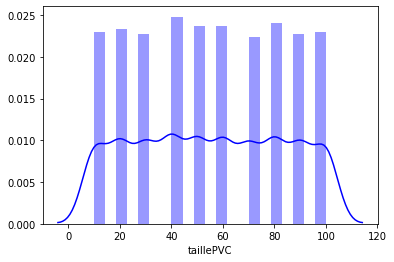

In [24]:
sns.distplot(df_ta.taillePVC, color = "blue")

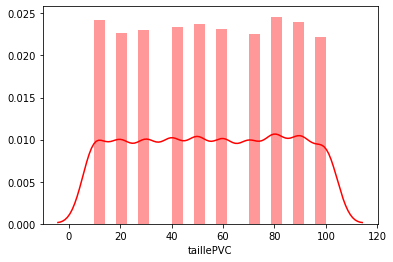

In [25]:
sns.distplot(df_ag.taillePVC, color = "red")


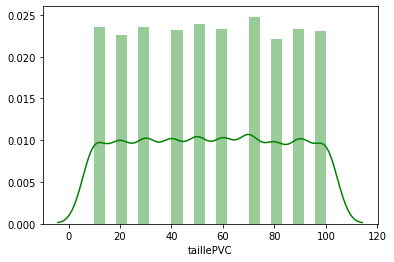

In [26]:
sns.distplot(df_rs.taillePVC, color = "green")

On remarque ainsi, que pour chaque algorithme, on dispose d'une distribution assez homogène du nombre de villes à traîter. 

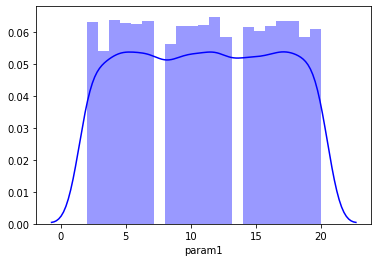

In [52]:
sns.distplot(df_ag.param1, color="blue")


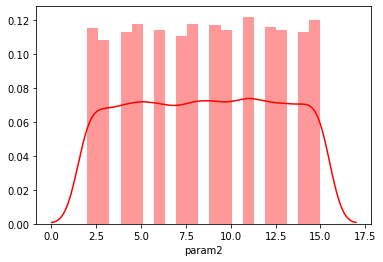

In [53]:
sns.distplot(df_ag.param2, color="red")


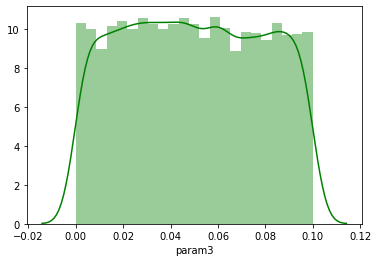

In [54]:
sns.distplot(df_ag.param3, color="green")


On remarque alors que les distributions des différents paramètres sont relativement homogènes également. 

De plus, on remarque que l'algorithme génétique se démarque des algorithmes Tabou et Recuit Simulé par sa vitesse d'exécution :

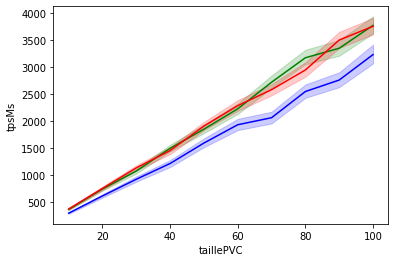

In [30]:
sns.lineplot(x="taillePVC", y="tpsMs", data=df_ag, palette="muted",color = "blue")
sns.lineplot(x="taillePVC", y="tpsMs", data=df_ta, palette="muted",color = "green")
sns.lineplot(x="taillePVC", y="tpsMs", data=df_rs, palette="muted",color = "red")

Cependant les différences de résultats entre les différents algorithmes (en ce qui concerne la distance optimale) est très faible : 

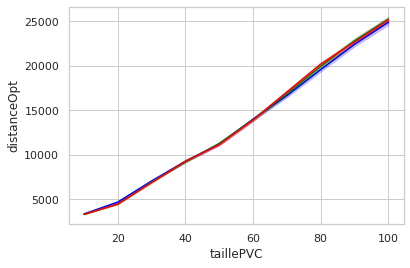

In [68]:
sns.lineplot(x="taillePVC", y="distanceOpt", data=df_ag, palette="muted",color = "blue")
sns.lineplot(x="taillePVC", y="distanceOpt", data=df_ta, palette="muted",color = "green")
sns.lineplot(x="taillePVC", y="distanceOpt", data=df_rs, palette="muted",color = "red")

C'est donc principalement grâce à sa rapidié d'exécution que l'algorithme génétique se distingue des deux autres algorithmes quand on regarde le score :

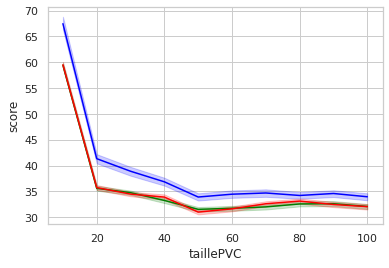

In [74]:
sns.lineplot(x="taillePVC", y="score", data=df_ag, palette="muted",color = "blue")
sns.lineplot(x="taillePVC", y="score", data=df_ta, palette="muted",color = "green")
sns.lineplot(x="taillePVC", y="score", data=df_rs, palette="muted",color = "red")

## Optimisation du Tabou

On essaye de déterminer la valeur du paramètre 1 (la taille de la liste de l'algorithme Tabou) qui permet d'optimiser le score :

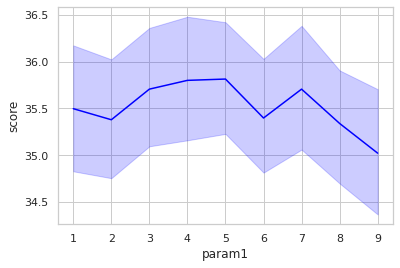

In [75]:
sns.lineplot(x="param1", y="score", data=df_ta, palette="muted",color = "blue")


On remarque que la valeur *param1 = 5* semble être une valeur privilégiée dans le cas de notre étude (ce qui correspond à *tabuListMaxSize = 5*).

## Optismisation du Recuit Simulé 

On essaye de procéder de même pour l'algorithme de recuit simulé. On utilise le module *scipy.optimize* pour essayer de trouver des minima locaux. Pour utiliser ce procédé on met en place une fonction permettant d'estimer la valeur du score au point étudié en se référant au score du point de la surface le plus proche (en considérant une distance euclidienne) présent dans la base de donnée.

In [39]:
def distance(x1,x2):
    return np.sqrt(x1**2+x2**2)

def objective(X,dataset):
    imin = 0
    minDist = distance(dataset.values[0][3]-X[0],dataset.values[0][4]-X[1])
    for i in range(1,len(dataset)):
        l = dataset.values[i]
        d = distance(l[3]-X[0],l[4]-X[1])
        if d<minDist:
            imin = i 
            minDist= d
    return 1/dataset.values[imin][8]

from scipy.optimize import minimize
x0=[0,0,0]

#sol = minimize(objective,x0,args = (df_rs))
#print(sol)

Les temps de calculs sont importants et les essais ne semblent que très peu concluant on essaye avec une autre mesure de la distance, nécessitant moins de calculs, reposant sur la moyenne des scores des points les plus proches selon chaque coordonées : 

In [40]:
def distance(x1,x2):
    return np.sqrt(x1**2+x2**2)


def dist(X):
    return X[0]**2

def objective(X,dataset):
    print(dataset.shape)
    idx1 = dataset['param1'].sub(X[0]).abs().values.argmin()
    idx2 = dataset['param2'].sub(X[1]).abs().values.argmin()
    print(idx1,idx2)
    m = (dataset.values[idx1][8]+dataset.values[idx2][8])/2
    return 1/m

from scipy.optimize import minimize
x0=[400,0.4]

#sol = minimize(objective,x0,method='CG',args = (df_rs))
#print(sol)

De la même manière, les résultats obtenus sont peu convaincants. On cherche donc à visualiser cette surface pour chercher à comprendre la difficulté à obtenir une optimisation intéressante.

In [41]:

X = np.array(df_rs["param1"])
Y = np.array(df_rs["param2"])
Z = np.array(df_rs["score"])

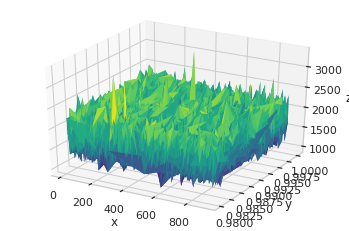

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z,cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

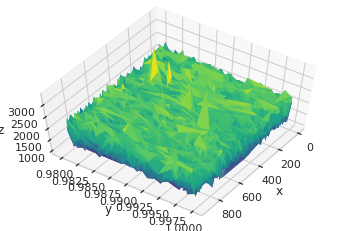

In [78]:
ax.view_init(60, 35)
fig

On remarque que la surface est très irrégulière, ce qui peut expliquer la difficulté des méthodes employées à déterminer un maximum local. On peut remarquer qu'une valeur d'intérêt semble être présente pour $X = 200$ et $Y = 0.982$ (correspondant respectivement à une température de départ de 200 et un *cooling rate* de 0.982)

## Optismisation de l'Algorithme Génétique

In [37]:
def distance(x1,x2,x3):
    return np.sqrt(x1**2+x2**2+x3**2)

def objective(X,dataset):
    imin = 0
    minDist = distance(dataset.values[0][3]-X[0],dataset.values[0][4]-X[1],dataset.values[0][5]-X[2])
    for i in range(1,len(dataset)):
        l = dataset.values[i]
        d = distance(l[3]-X[0],l[4]-X[1],l[5]-X[2])
        if d<minDist:
            imin = i 
            minDist= d
    return 1/dataset.values[imin][9]

from scipy.optimize import minimize
x0=[0,0,0]

#sol = minimize(objective,x0,args = (df_ag))
#print(sol)

Nous avons adapté les méthodes précédentes et les résultats sont de même peu concluant. 

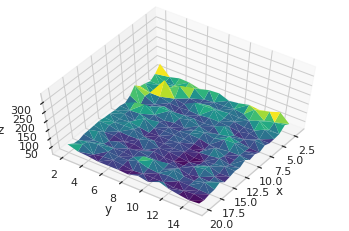

In [93]:
X = np.array(df_ag["param1"])
Y = np.array(df_ag["param2"])
Z = np.array(df_ag["score"])

ax1 = plt.axes(projection='3d')
ax1.plot_trisurf(X, Y, Z,cmap='viridis', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(60, 35)


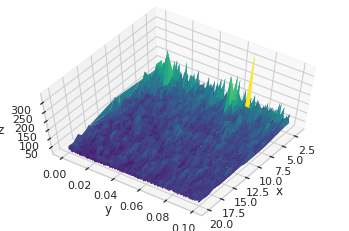

In [94]:
X = np.array(df_ag["param1"])
Y = np.array(df_ag["param3"])
Z = np.array(df_ag["score"])

ax1 = plt.axes(projection='3d')
ax1.plot_trisurf(X, Y, Z,cmap='viridis', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(60, 35)


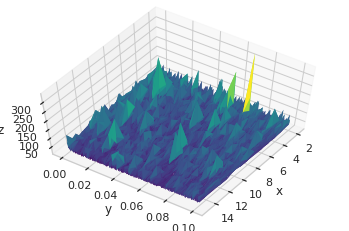

In [95]:
X = np.array(df_ag["param2"])
Y = np.array(df_ag["param3"])
Z = np.array(df_ag["score"])

ax1 = plt.axes(projection='3d')
ax1.plot_trisurf(X, Y, Z,cmap='viridis', edgecolor='none')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(60, 35)


À la vue des différentes surfaces (décompositions par duo de paramètres de l'espace des paramètres) on peut supposer que leurs irrégularités expliquent la difficultée des algorithmes d'opotimisation. Les paramètres étaient ici : la taille de la population, la taille de l'arène et le ratio de mutation de l'algorithme génétique. 